# Breast Cancer Classification Project

The project is to build a machine learning model to predict whether the tumor is benign or malignant basedon several observations/features.

We're going to take the following approach:

- Problem Definition
- Data
- Features
- Exploratory Data Analysis
- Modelling
- Experimentation

# 1. Problem Definition

How well can we predict whether a tumor is benign or malignant basedon, given its several observations/features.

# 2. Data

Data: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

# 3.Features

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32) Features

Examples Features:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

# Create dataframe

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv("data.csv")

In [78]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Exploratory Data Analysis

In [79]:
df.shape

(569, 33)

In [80]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [82]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [83]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Droping Columns

In [84]:
df = df.drop(['id','Unnamed: 32'],axis=1)

In [85]:
df.shape

(569, 31)

# Checking for outliers

<ipython-input-156-a287de8c5ade>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(17,1))


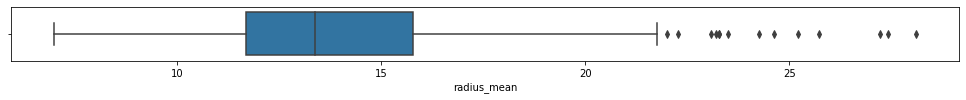

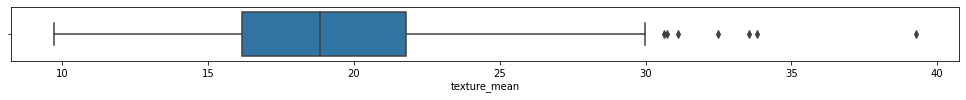

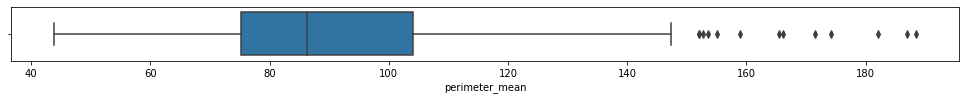

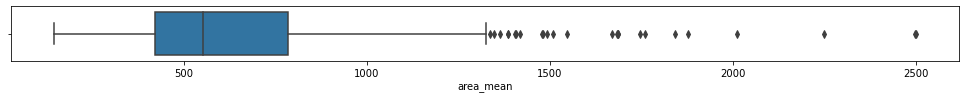

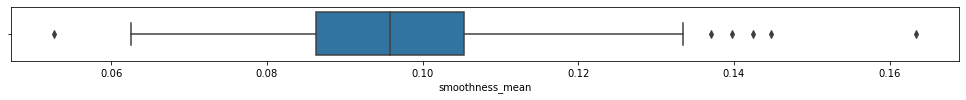

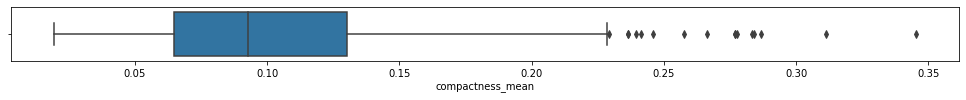

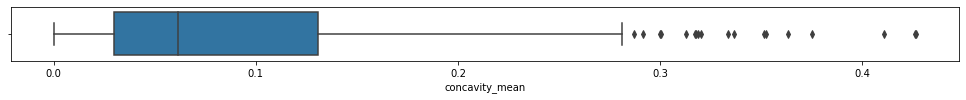

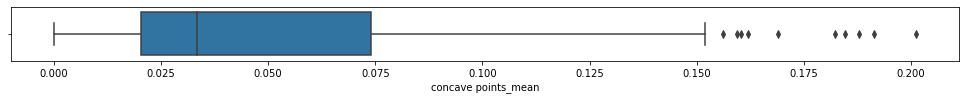

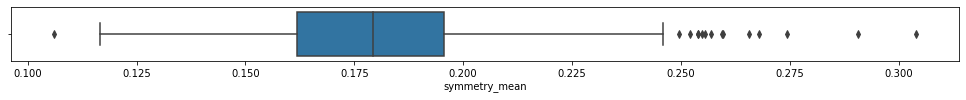

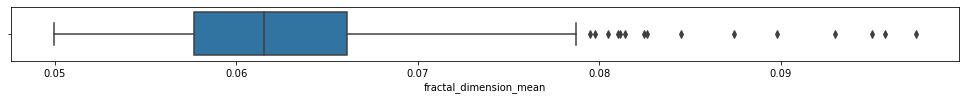

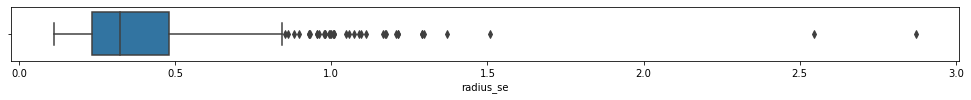

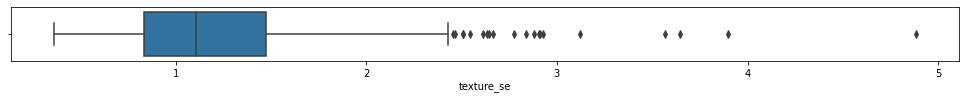

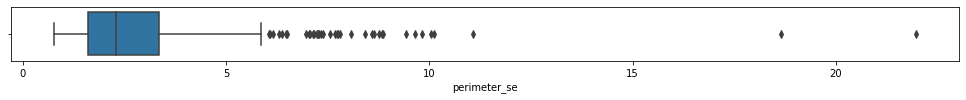

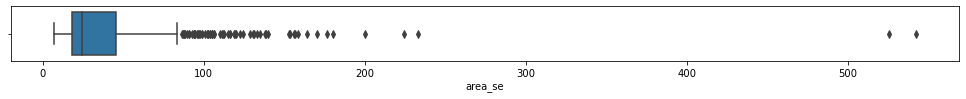

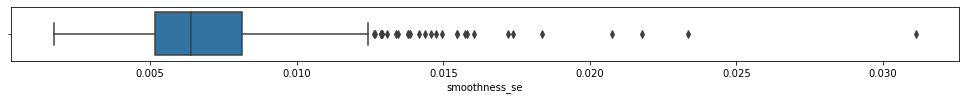

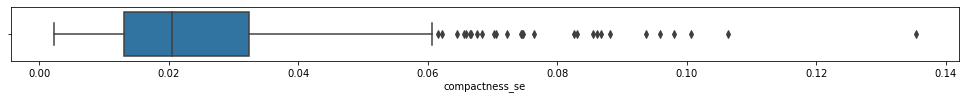

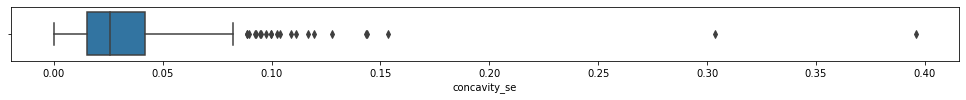

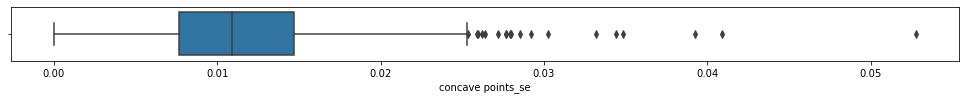

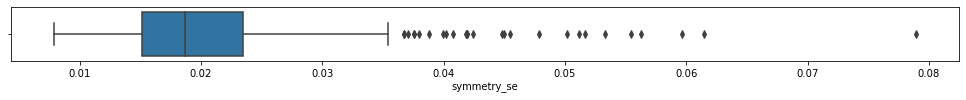

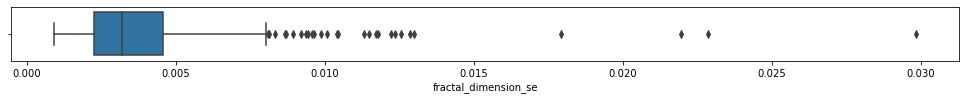

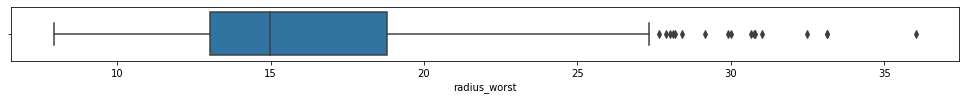

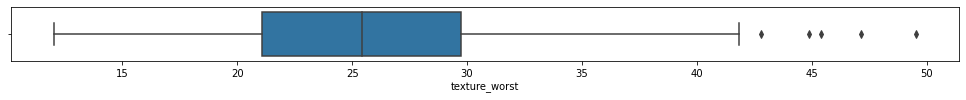

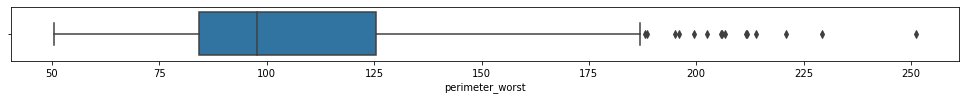

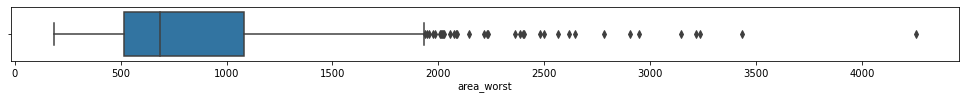

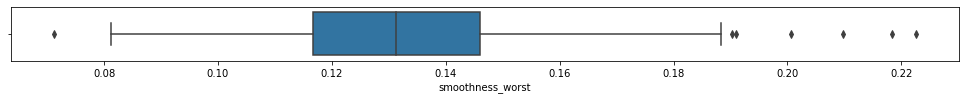

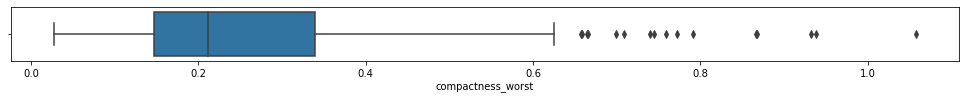

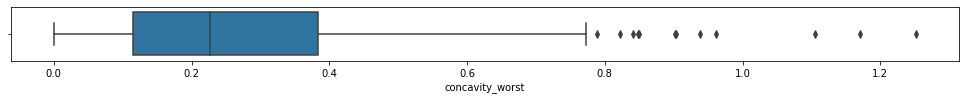

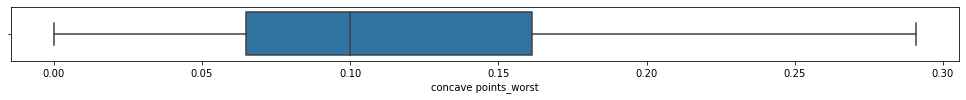

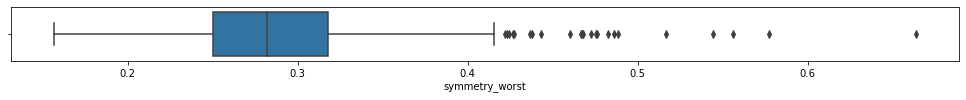

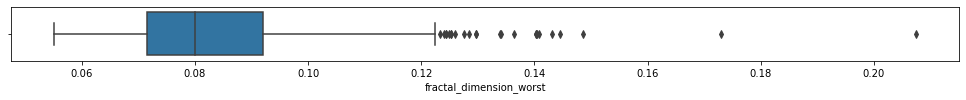

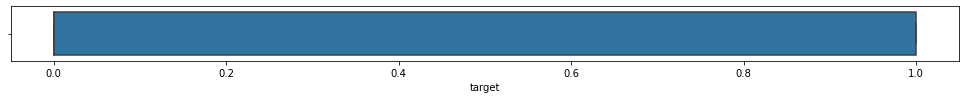

In [156]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

# Performing Label encoding

In [86]:
# encoding the target column 
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

labels = label_encode.fit_transform(df['diagnosis'])

df['target'] = labels
df.drop(columns='diagnosis', axis=1, inplace=True)

Benign --> 0

Malignant --> 1

# check the balance of data

In [87]:
df['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

There are 357 Benign cases and 212 Magliant cases. We need to keep in mind that dataset is not that balanced.

In [88]:
357 / len(df), 211/ len(df)

(0.6274165202108963, 0.37082601054481545)

<AxesSubplot:xlabel='target', ylabel='count'>

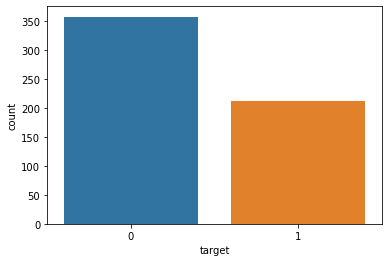

In [89]:
sns.countplot(data=df, x='target')

# Check quick relationship between some features

In [90]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'target'],
      dtype='object')

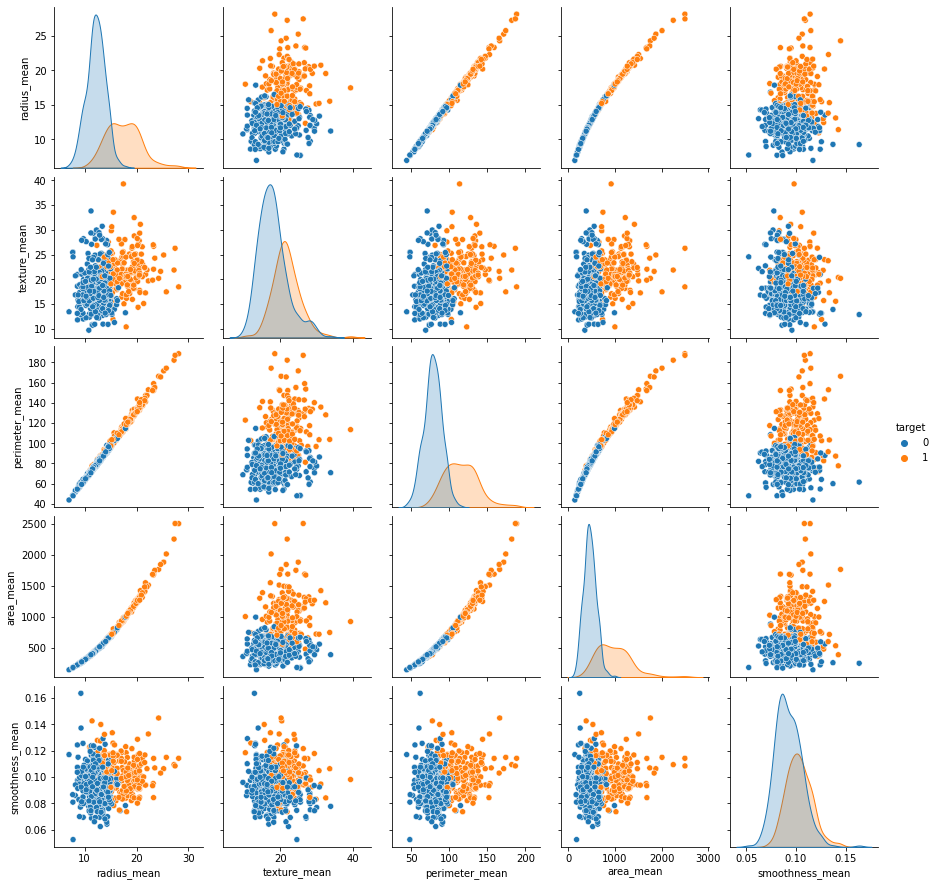

In [91]:
sns.pairplot(data=df, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean'], hue='target');

# Check the correlationship between features

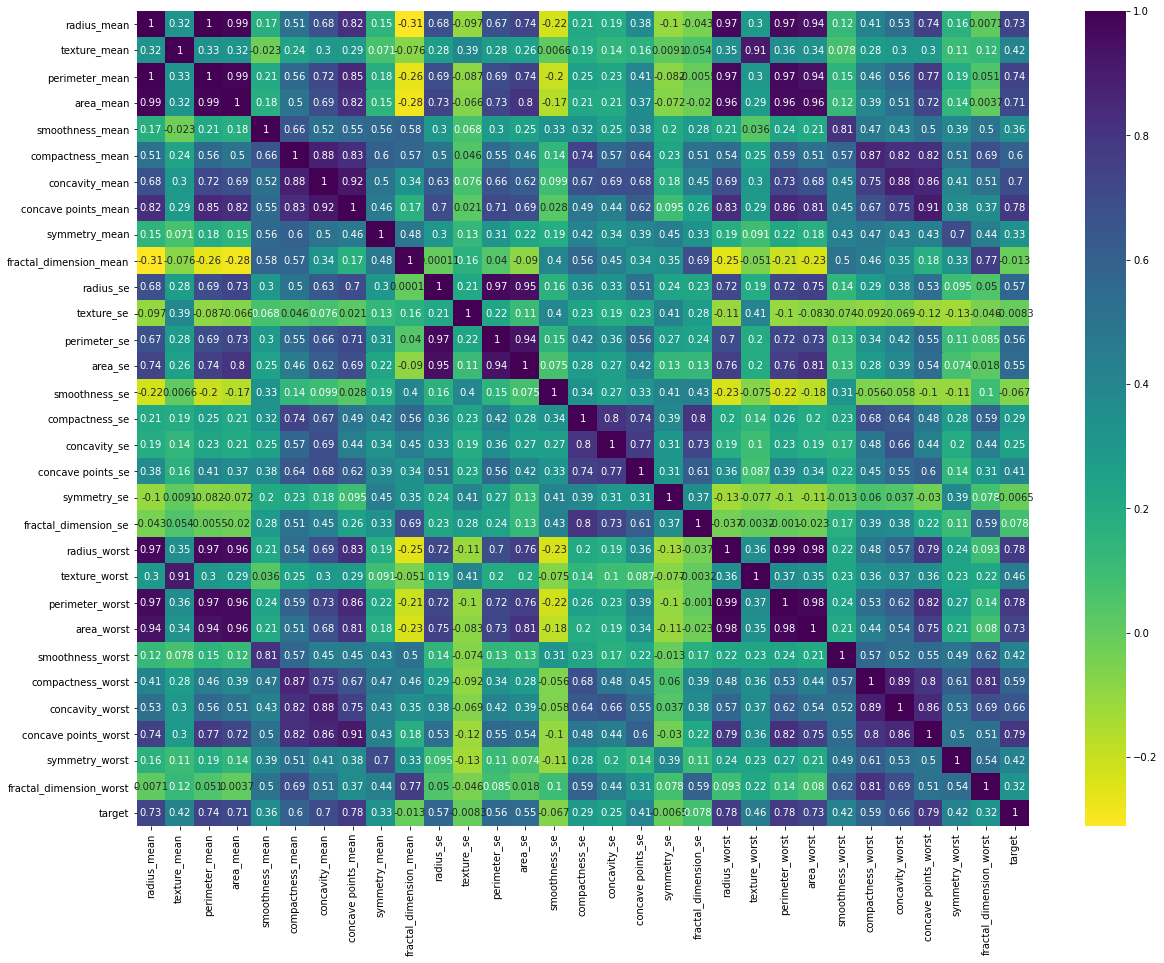

In [92]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='viridis_r');

# check the correlationship of features and Target label

In [93]:
df.corr()['target'].sort_values(ascending=False)

target                     1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

<AxesSubplot:>

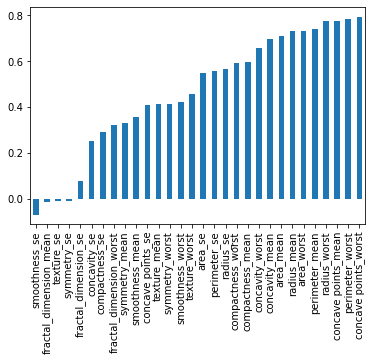

In [94]:
df.corr()['target'][:-1].sort_values().plot(kind='bar')

Seem like smoothness error has the highest negative correlationship with target lable. On the other hand, worst concave points has the highest positive correlationship with target.

# 6. Modelling

# Train, Test and Split

In [95]:
X = df.drop('target', axis=1)
y = df['target']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

# Model Training

In [99]:
from sklearn.svm import SVC

In [100]:
svc_model = SVC()

In [101]:
svc_model.fit(X_train, y_train)

SVC()

# Model Evaluation

In [102]:
y_preds = svc_model.predict(X_test)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [104]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



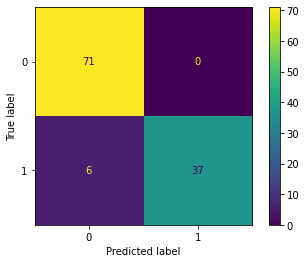

In [105]:
plot_confusion_matrix(svc_model, X_test, y_test);

There are 6 False Negative cases (Type II Error).

# Experimentation (Improving the model)

# Data Normalization

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()

In [108]:
# scaling
scaled_X_train = scaler.fit_transform(X_train) 
scaled_X_test = scaler.transform(X_test)

In [109]:
# after scaling, as column names are removed. so we need to re-attach them
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.065527,0.257694,0.077323,0.034369,0.487226,0.417506,0.733365,0.217445,0.504004,0.642376,...,0.059645,0.283316,0.055971,0.025084,0.523195,0.449380,1.000000,0.601375,0.524936,0.529502
1,0.656203,0.570172,0.674207,0.489402,0.554934,0.903431,0.582709,0.743539,0.655633,0.505897,...,0.657920,0.571962,0.620253,0.462832,0.529308,0.802879,0.541534,0.997595,0.499310,0.621906
2,0.072579,0.140345,0.080239,0.038831,0.221901,0.233306,0.140300,0.108350,0.626802,0.414280,...,0.048681,0.192164,0.056428,0.021462,0.184677,0.154303,0.111581,0.174811,0.338459,0.253137
3,0.144914,0.524518,0.142908,0.075774,0.396678,0.181357,0.055740,0.080268,0.389749,0.280750,...,0.130546,0.617537,0.119414,0.057587,0.534742,0.123555,0.089856,0.210859,0.363493,0.224059
4,0.121407,0.174839,0.118296,0.060714,0.548614,0.209677,0.025398,0.064115,0.841431,0.413648,...,0.085593,0.144723,0.078135,0.035977,0.382599,0.078376,0.017316,0.088625,0.392667,0.213293


In [110]:
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)
scaled_X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.234047,0.300643,0.235951,0.133657,0.424483,0.295939,0.187559,0.189911,0.404698,0.290017,...,0.229954,0.336354,0.211275,0.112718,0.485159,0.231175,0.213339,0.348797,0.285630,0.275178
1,0.550908,0.392289,0.538341,0.411739,0.338178,0.286008,0.253046,0.395179,0.221570,0.097936,...,0.591404,0.388060,0.566367,0.407503,0.326903,0.226562,0.214617,0.614777,0.194362,0.091980
2,0.380479,0.330402,0.382558,0.248219,0.510698,0.352442,0.343486,0.401938,0.407902,0.168492,...,0.386741,0.372601,0.357938,0.231342,0.566664,0.232932,0.302796,0.520275,0.250739,0.213208
3,0.230619,0.269530,0.238654,0.127607,0.476393,0.384289,0.181373,0.139115,0.343833,0.443555,...,0.153571,0.290245,0.178537,0.072499,0.501460,0.258739,0.191933,0.253265,0.195348,0.326806
4,0.188501,0.159959,0.190141,0.099760,0.426198,0.317170,0.157849,0.128926,0.347571,0.376158,...,0.130911,0.204158,0.123481,0.058108,0.430143,0.202622,0.143530,0.237732,0.150601,0.222957


In [111]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

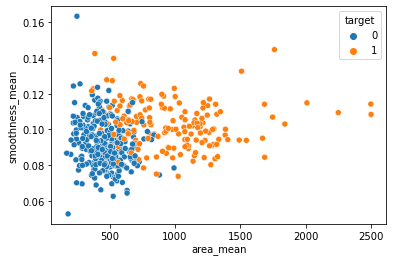

In [112]:
# Before Scaling
sns.scatterplot(data=X_train, x='area_mean', y='smoothness_mean', hue=y_train);

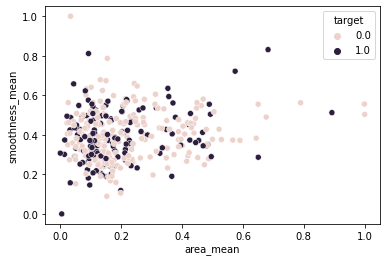

In [113]:
# After Scaling
sns.scatterplot(x=scaled_X_train['area_mean'], y=scaled_X_train['smoothness_mean'], hue=y_train);

# Model Training and Evaluation

In [114]:
svc_model.fit(scaled_X_train, y_train)

SVC()

In [115]:
y_preds = svc_model.predict(scaled_X_test)

In [116]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



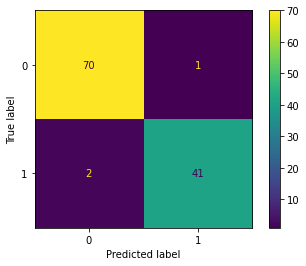

In [117]:
plot_confusion_matrix(svc_model, scaled_X_test, y_test)

We can see that improvement on our model. There are only 2 False Negative cases (Type II Error), reduced from 6.

However, we can see that there is 1 False positive case which we want to avoid.

# using Grid Search CV

To have more imporvment on our model, we will use GridSearchCV to find the best parameters, then use those to refit the model.

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
parameters = {
    'C': [0.1, 1, 10, 50, 100, 150],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5, 6],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

In [120]:
grid_model = GridSearchCV(SVC(), parameters, cv=5, refit=True, verbose=4) # will refit the model based on based parameters found

In [121]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END .....C=0.1, degree=3, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 2/5] END .....C=0.1, degree=3, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 3/5] END .....C=0.1, degree=3, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 4/5] END .....C=0.1, degree=3, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 5/5] END .....C=0.1, degree=3, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 1/5] END ......C=0.1, degree=3, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 2/5] END ......C=0.1, degree=3, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 3/5] END ......C=0.1, degree=3, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 4/5] END ......C=0.1, degree=3, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5] END ......C=0.1, degree=3, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..C=0.1, degree=3, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ..C=0.1, degree=3, gamma=0.0001,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 150],
                         'degree': [3, 4, 5, 6],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=4)

In [122]:
grid_model.best_params_

{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

# Model Evaluation

In [123]:
grid_predictions = grid_model.predict(scaled_X_test)

In [124]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



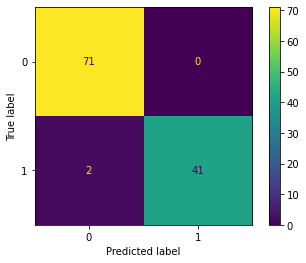

In [125]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

We can see that improvement on our model.

There are still 2 False Negative cases, but no False positive cases.

# using RandomizedSearchCV

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [127]:
parameters = {
    'C': stats.uniform(0.1, 10),
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5, 6],
    'gamma': stats.uniform(0.1, 10)
}

In [128]:
rs_model = RandomizedSearchCV(SVC(), parameters, cv=5, refit=True, verbose=4) # will refit the model based on based parameters found

In [129]:
rs_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=2.214093806955715, degree=4, gamma=5.060048689732708, kernel=rbf; total time=   0.0s
[CV 2/5] END C=2.214093806955715, degree=4, gamma=5.060048689732708, kernel=rbf; total time=   0.0s
[CV 3/5] END C=2.214093806955715, degree=4, gamma=5.060048689732708, kernel=rbf; total time=   0.0s
[CV 4/5] END C=2.214093806955715, degree=4, gamma=5.060048689732708, kernel=rbf; total time=   0.0s
[CV 5/5] END C=2.214093806955715, degree=4, gamma=5.060048689732708, kernel=rbf; total time=   0.0s
[CV 1/5] END C=8.006306585917036, degree=5, gamma=6.714771047252845, kernel=rbf; total time=   0.0s
[CV 2/5] END C=8.006306585917036, degree=5, gamma=6.714771047252845, kernel=rbf; total time=   0.0s
[CV 3/5] END C=8.006306585917036, degree=5, gamma=6.714771047252845, kernel=rbf; total time=   0.0s
[CV 4/5] END C=8.006306585917036, degree=5, gamma=6.714771047252845, kernel=rbf; total time=   0.0s
[CV 5/5] END C=8.006306585917036, degre

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A3A086A760>,
                                        'degree': [3, 4, 5, 6],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A3A086A490>,
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   verbose=4)

In [130]:
rs_model.best_params_

{'C': 6.499535929192984,
 'degree': 3,
 'gamma': 1.0464568785709394,
 'kernel': 'rbf'}

# Model Evaluation

In [131]:
rs_predictions = rs_model.predict(scaled_X_test)

In [132]:
print(classification_report(y_test, rs_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



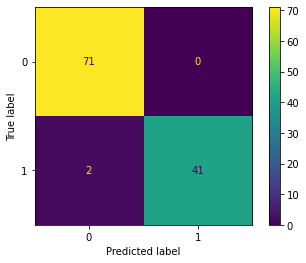

In [133]:
plot_confusion_matrix(rs_model, scaled_X_test, y_test);

# Conclusion:

The predictions result using GridSearchCV and RandomizedSearchCV yield the same results. So We can either choose one of those as final model.

# Trying different algorithms

# Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)

In [136]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [140]:
y_pred_dt = dt.predict(X_test)

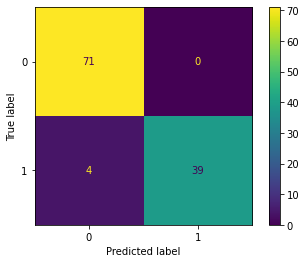

In [138]:
plot_confusion_matrix(dt,X_test, y_test)

In [141]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [154]:
y_preds = dt.predict(scaled_X_test)

In [155]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



E:\AnacondaWorkspace\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\AnacondaWorkspace\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\AnacondaWorkspace\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision tree accuracy is worst with normalisation.

# XGBoost

In [146]:
#pip install xgboost

  Using cached xgboost-1.5.2-py3-none-win_amd64.whl (106.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [147]:
import xgboost as xgb

In [148]:
xg = xgb.XGBClassifier()

In [149]:
xg.fit(X_train,y_train)

E:\AnacondaWorkspace\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:16:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [150]:
y_pred_xg = xg.predict(X_test)

In [151]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



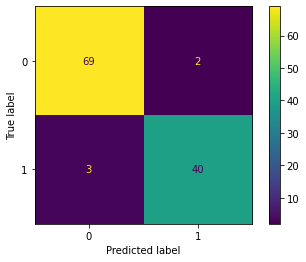

In [152]:
plot_confusion_matrix(xg,X_test, y_test)

Decision tree is giving better accuracy than XGBoost

# Naive Bayes

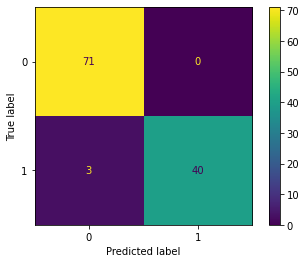

In [157]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
plot_confusion_matrix(model,X_test, y_test)

In [158]:
y_pred_nv = model.predict(X_test)
print(classification_report(y_test, y_pred_nv))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

